# Bag Analysis Task

### Import

In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read ROS BAG file using bagpy

In [2]:
b = bagreader('/home/nayan/NODE_Robotics/environment_files/dummy_env-agv-50231.agv-2020-10-01T082312+0200_2020-10-01-11-28-17_37.bag')

[INFO]  Data folder /home/nayan/NODE_Robotics/environment_files/dummy_env-agv-50231.agv-2020-10-01T082312+0200_2020-10-01-11-28-17_37 already exists. Not creating.


### Inspect Topics

In [3]:
b.topic_table

,Topics,Types,Message Count,Frequency
0,/BMS/SOC,std_msgs/Float64,3000,9.924763
1,/BMS/U,std_msgs/Float64,3000,9.924786
2,/bmw_control/left/motor_state_throttled,knx_motor_control/WittensteinMotorState,2888,9.920608
3,/bmw_control/right/motor_state_throttled,knx_motor_control/WittensteinMotorState,2888,9.921171
4,/clock,rosgraph_msgs/Clock,6065,19.861604
...,...,...,...,...
67,/stop_signal_soft,std_msgs/Bool,2,0.022214
68,/stop_signal_soft_teleop_override,std_msgs/Bool,3,0.023870
69,/tf,tf2_msgs/TFMessage,59442,NaN
70,/tf_static,tf2_msgs/TFMessage,1,NaN


### Inspect Topic: /cmd_vel to check when robot stops

In [4]:
cmd_vel_msg = b.message_by_topic('/cmd_vel')
df_cmd_vel_msg = pd.read_csv(cmd_vel_msg)
df_cmd_vel_msg

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.601544e+09,0.419721,0.0,0.0,0.0,0.0,0.141330
1,1.601544e+09,0.427854,0.0,0.0,0.0,0.0,0.112794
2,1.601544e+09,0.427854,0.0,0.0,0.0,0.0,0.112794
3,1.601544e+09,0.429113,0.0,0.0,0.0,0.0,0.108376
4,1.601544e+09,0.430095,0.0,0.0,0.0,0.0,0.104930
...,...,...,...,...,...,...,...
8995,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
8996,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
8997,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000
8998,1.601545e+09,0.000000,0.0,0.0,0.0,0.0,0.000000


### Plotting time vs linear velocity in x graph

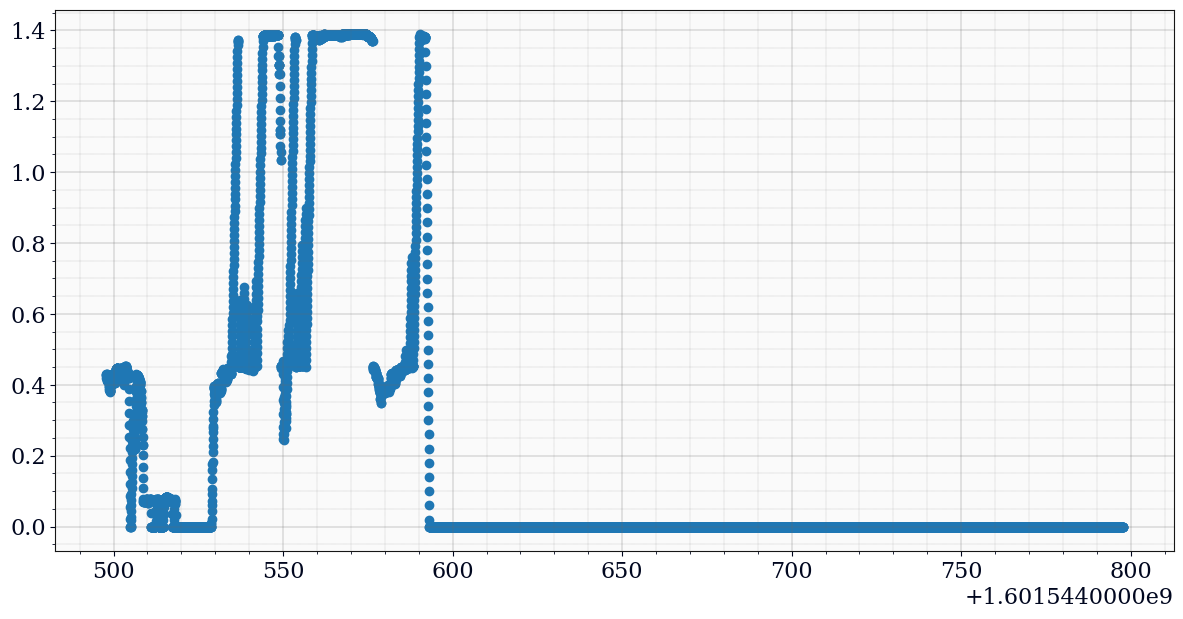

In [5]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='linear.x', data=df_cmd_vel_msg)
plt.show()

### Plotting time vs angular velocity in z graph

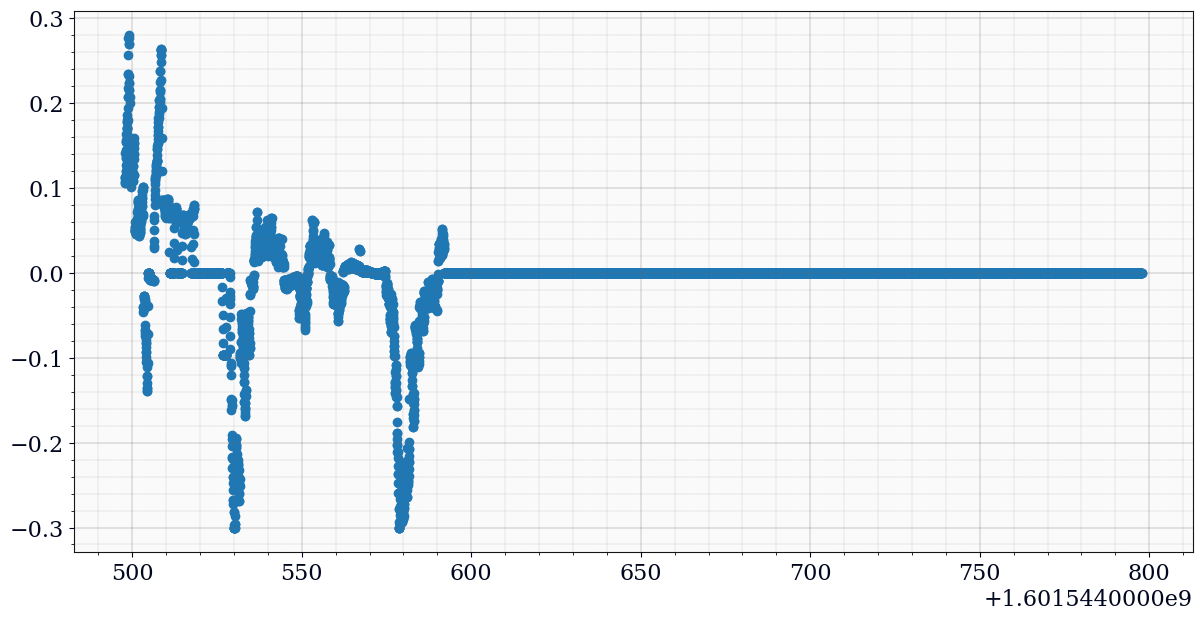

In [6]:
fig, ax = bagpy.create_fig(1)
ax[0].scatter(x='Time', y='angular.z', data=df_cmd_vel_msg)
plt.show()